In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pandas scikit-learn seaborn


In [3]:
!pip install scikit-learn

applying smote analysis


In [4]:
from imblearn.over_sampling import SMOTE


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
smote = SMOTE(random_state=42)


Total number of samples in the dataset before SMOTE: 443

Number of samples for each class before SMOTE:
Class Mild: 192
Class Severe: 152
Class Moderate: 71


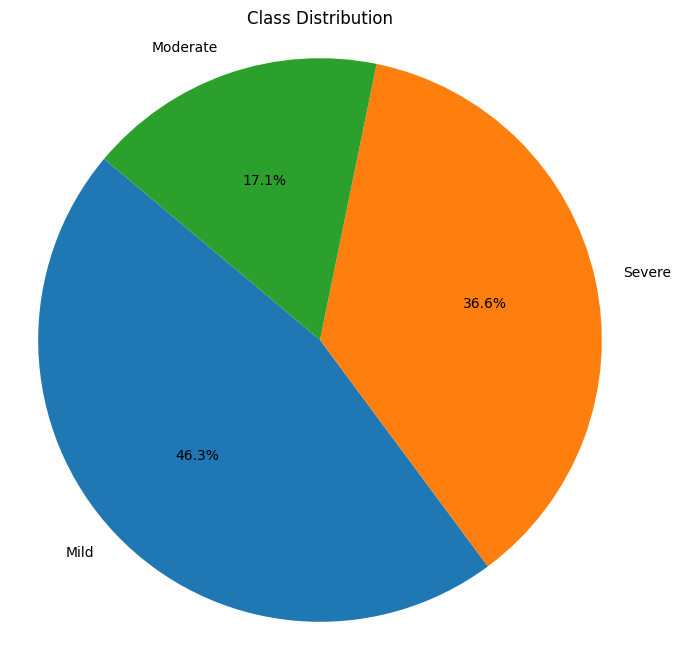

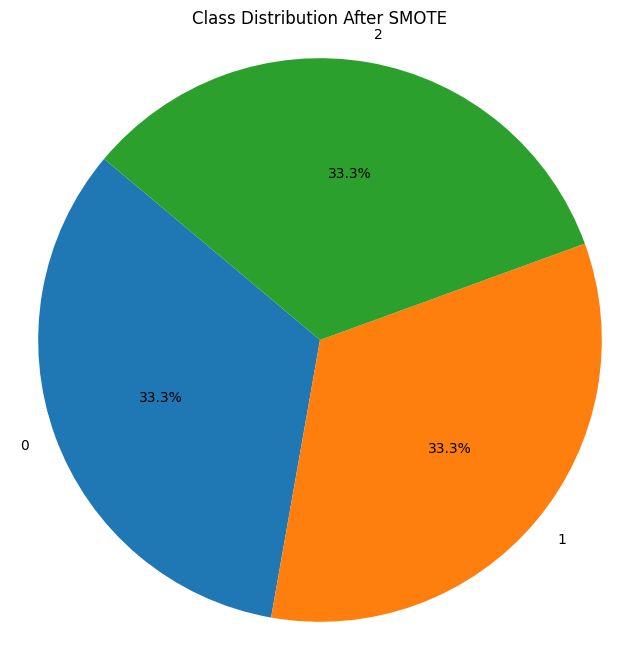


Number of samples for each class after SMOTE:
Class 0: 157
Class 1: 157
Class 2: 157

Best hyperparameters for Random Forest: {'classifier__max_depth': 15, 'classifier__n_estimators': 100}
Random Forest Accuracy: 0.8313253012048193
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.50      0.64      0.56        14
           2       0.90      0.76      0.83        34

    accuracy                           0.83        83
   macro avg       0.78      0.79      0.78        83
weighted avg       0.85      0.83      0.84        83



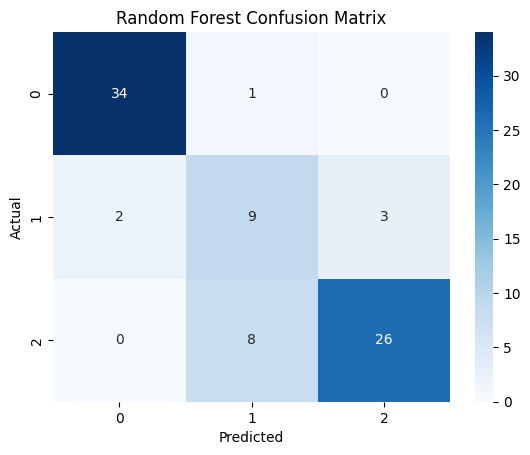

Random Forest Sensitivity (Recall): 0.7930
Random Forest Specificity: 2.0952

Best hyperparameters for Support Vector Machine: {'classifier__C': 10, 'classifier__gamma': 'auto'}
Support Vector Machine Accuracy: 0.6506024096385542
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.31      0.64      0.42        14
           2       0.78      0.53      0.63        34

    accuracy                           0.65        83
   macro avg       0.65      0.65      0.62        83
weighted avg       0.74      0.65      0.67        83



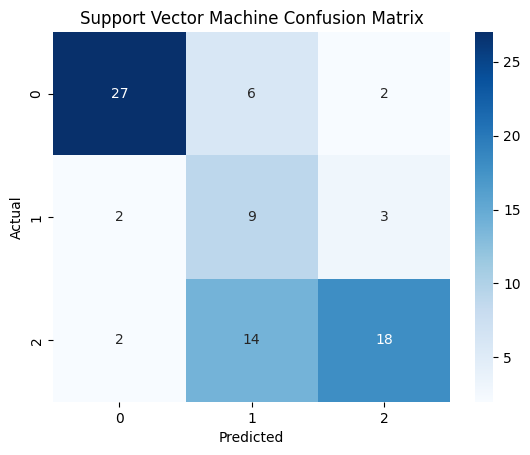

Support Vector Machine Sensitivity (Recall): 0.6479
Support Vector Machine Specificity: 1.4438

Best hyperparameters for Decision Tree: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 20, 'classifier__splitter': 'best'}
Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        34

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



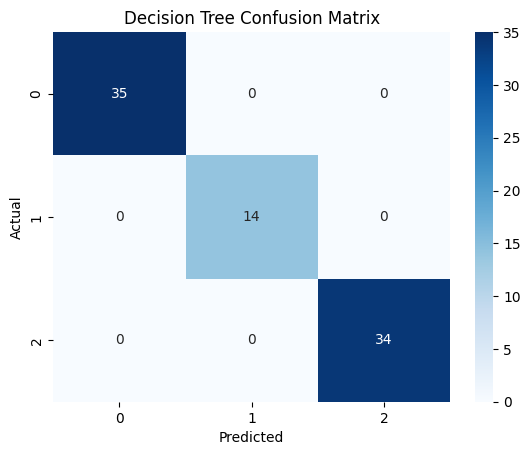

Decision Tree Sensitivity (Recall): 1.0000
Decision Tree Specificity: 2.7378

Best hyperparameters for XGBoost: {'classifier__learning_rate': 0.001, 'classifier__max_depth': 1, 'classifier__min_child_weight': 50}
XGBoost Accuracy: 1.0
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        34

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



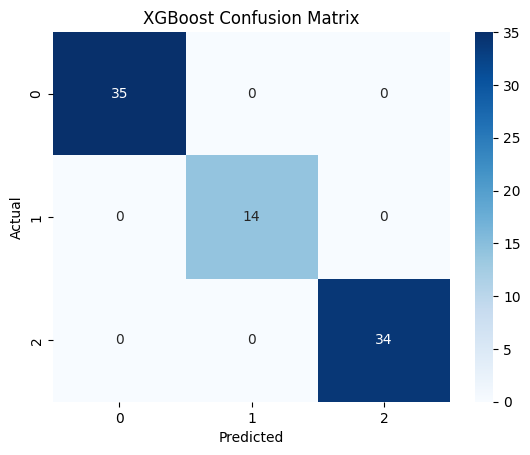

XGBoost Sensitivity (Recall): 1.0000
XGBoost Specificity: 2.7378


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Print total number of samples in the dataset
total_samples = df.shape[0]
print("Total number of samples in the dataset before SMOTE:", total_samples)

# Remove rows with NaN values (optional, handle missing data if needed)
df.dropna(inplace=True)

# Print number of samples for each class before SMOTE
class_distribution_before_smote = df["Calculated_Severity"].value_counts()
print("\nNumber of samples for each class before SMOTE:")
for class_label, count in class_distribution_before_smote.items():
    print(f"Class {class_label}: {count}")

# Display class distribution
plt.figure(figsize=(8, 8))
plt.title("Class Distribution")
plt.pie(class_distribution_before_smote, labels=class_distribution_before_smote.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# Define features and target variable
X = df.drop(columns=["Calculated_Severity"])
y = df["Calculated_Severity"]

# Encode categorical labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Get column indices after preprocessing
num_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['int64', 'float64']).columns]
cat_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object']).columns]

# Define preprocessing steps with handle_unknown='ignore' and ensure output is dense
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_indices),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_indices)
    ],
    sparse_threshold=0
)

# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Plot class distribution after SMOTE using a pie chart
plt.figure(figsize=(8, 8))
plt.title("Class Distribution After SMOTE")
plt.pie(np.bincount(y_train_resampled), labels=np.unique(y_train_resampled), autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# Print numbers of samples for each class after SMOTE
print("\nNumber of samples for each class after SMOTE:")
for class_label, count in zip(*np.unique(y_train_resampled, return_counts=True)):
    print(f"Class {class_label}: {count}")

# Initialize classifiers with custom hyperparameters for Random Forest
# Initialize classifiers with adjusted hyperparameters for Random Forest and Decision Tree
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),  # Adjusted hyperparameters for Random Forest
    "Support Vector Machine": SVC(),  # No changes to SVM
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=25, splitter='random'), # Adjusted hyperparameters for Decision Tree  # Adjusted hyperparameters for Decision Tree
    "XGBoost": xgb.XGBClassifier(max_depth=1, min_child_weight=100, learning_rate=0.001)  # More aggressive adjustments for XGBoost
}

# Define parameter grids for each classifier using column indices
param_grids = {
    "Random Forest": {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__max_depth": [5, 10, 15]
    },
    "Support Vector Machine": {
        "classifier__C": [0.1, 1, 10],
        "classifier__gamma": ['scale', 'auto']
    },
    "Decision Tree": {
        "classifier__max_depth": [3, 5, 7],
        "classifier__min_samples_split": [20, 50, 100],
        "classifier__min_samples_leaf": [10, 25, 50],
        "classifier__splitter": ['best', 'random']
    },
    "XGBoost": {
        "classifier__max_depth": [1, 3, 5],
        "classifier__min_child_weight": [50, 100, 150],
        "classifier__learning_rate": [0.001, 0.01, 0.1]
    }
}

# Train and evaluate classifiers with preprocessing and hyperparameter tuning
for name, clf in classifiers.items():
    # Define pipeline including GridSearchCV
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[name], scoring='accuracy', cv=5)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get best hyperparameters
    best_params = grid_search.best_params_
    print(f"\nBest hyperparameters for {name}: {best_params}")

    # Retrieve best model from grid search
    best_model = grid_search.best_estimator_

    # Fit best model to training data
    best_model.fit(X_train_resampled, y_train_resampled)

    # Evaluate best model on test data
    y_pred = best_model.predict(X_test_processed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)

    # Generate classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Calculate sensitivity and specificity
    if len(conf_matrix) == 2:
        tn, fp, fn, tp = conf_matrix.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True Negative Rate
    else:
        # For multi-class classification, compute macro-average sensitivity and specificity
        sensitivity = np.mean([conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) > 0 else 0 for i in range(len(conf_matrix))])
        specificity = np.mean([np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)) / (np.sum(np.delete(conf_matrix, i, axis=0)) - conf_matrix[i, i]) if np.sum(np.delete(conf_matrix, i, axis=0)) > conf_matrix[i, i] else 0 for i in range(len(conf_matrix))])

    # Print sensitivity and specificity
    print(f"{name} Sensitivity (Recall): {sensitivity:.4f}")
    print(f"{name} Specificity: {specificity:.4f}")

    # Plot feature importance for classifiers that support it
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        feature_names = X.columns
        if len(importances) == len(feature_names):
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(10, 6))
            plt.title(f"{name} Feature Importances")
            plt.barh(range(X.shape[1]), importances[indices], align="center")
            plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
            plt.xlabel("Importance")
            plt.ylabel("Feature")
            plt.show()
        else:
            # Truncate importances to match the number of features
            importances = importances[:len(feature_names)]
            indices = np.argsort(importances)[::-1]
            plt.figure(figsize=(10, 6))
            plt.title(f"{name} Feature Importances")
            plt.barh(range(len(feature_names)), importances[indices], align="center")
            plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
            plt.xlabel("Importance")
            plt.ylabel("Feature")
            plt.show()



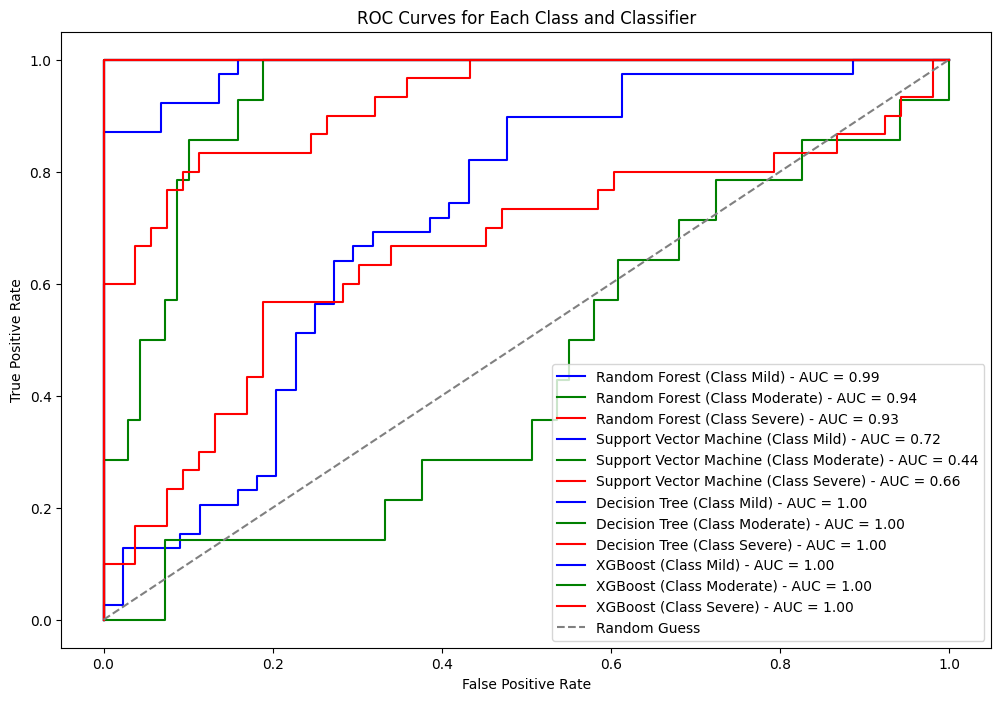

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Remove rows with NaN values
df.dropna(inplace=True)

# Define features and target variable
X = df.drop(columns=["Calculated_Severity"])
y = df["Calculated_Severity"]

# Encode target variable (labels) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    ],
    remainder='passthrough'
)

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False))  # Set with_mean=False to avoid centering sparse matrices
])

# Apply preprocessing pipeline to training and testing data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)
# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Support Vector Machine": SVC(probability=True, kernel='rbf', gamma='scale', C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(max_depth=3, min_child_weight=5, learning_rate=0.1, n_estimators=100, reg_alpha=1, reg_lambda=1, random_state=42)
}


# Train classifiers
trained_classifiers = {}
for name, clf in classifiers.items():
    model = Pipeline(steps=[('classifier', clf)])
    model.fit(X_train_processed, y_train)
    trained_classifiers[name] = model

# Plot ROC curves for each class and classifier
plt.figure(figsize=(12, 8))

# Set colors for each class
colors = ['b', 'g', 'r', 'c']  # Use consistent colors for each classifier

# Compute ROC curves and plot them for each class and classifier
for name, model in trained_classifiers.items():
    y_score = model.predict_proba(X_test_processed)

    # Compute ROC curves and AUC for each class
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve((y_test == i), y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], linestyle='-', label=f"{name} (Class {label_encoder.classes_[i]}) - AUC = {roc_auc:.2f}")

# Add the reference diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class and Classifier')
plt.legend(loc='lower right')

# Show the plot
plt.show()

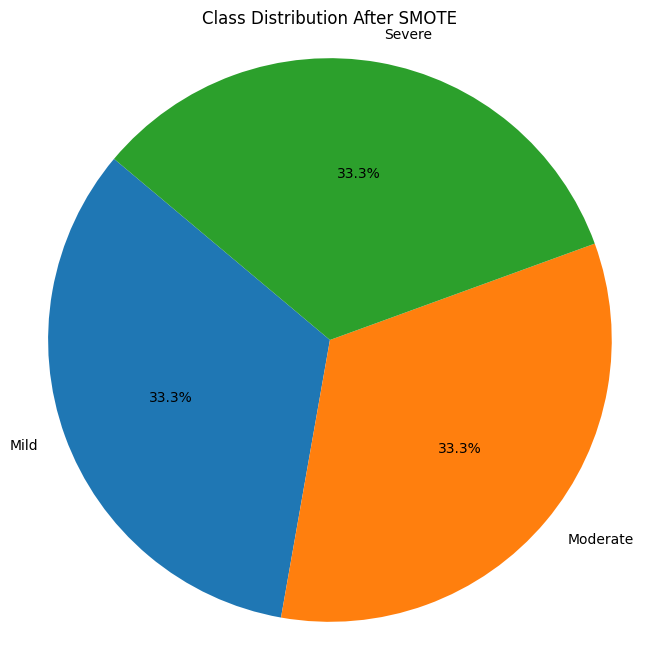


Number of samples for each class after SMOTE:
Class Mild: 157
Class Moderate: 157
Class Severe: 157
Iteration 1/200 - Best Accuracy: 0.9036 - Best Solution: [286.72838765  21.36654227]
Iteration 2/200 - Best Accuracy: 0.8916 - Best Solution: [480.00064144   1.        ]
Iteration 3/200 - Best Accuracy: 0.8795 - Best Solution: [72.54986059  8.99868097]
Iteration 4/200 - Best Accuracy: 0.8916 - Best Solution: [184.11546725   9.51451497]
Iteration 5/200 - Best Accuracy: 0.8193 - Best Solution: [1.         9.12653292]
Iteration 6/200 - Best Accuracy: 0.7590 - Best Solution: [1.         3.00622634]
Iteration 7/200 - Best Accuracy: 0.7229 - Best Solution: [1.         3.38360728]
Iteration 8/200 - Best Accuracy: 0.6747 - Best Solution: [1.38322636 2.703738  ]
Iteration 9/200 - Best Accuracy: 0.7229 - Best Solution: [2.80893399 1.77062688]
Iteration 10/200 - Best Accuracy: 0.5783 - Best Solution: [2.40097985 2.81625061]
Iteration 11/200 - Best Accuracy: 0.4578 - Best Solution: [1.         2.10

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

class GreyWolfOptimizer:
    """
    This class implements the Grey Wolf Optimization algorithm.
    """
    def __init__(self, num_agents, max_iter, problem_dimension, lower_bound, upper_bound):
        self.num_agents = num_agents
        self.max_iter = max_iter
        self.problem_dimension = problem_dimension
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def initialize_population(self):
        return np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=(self.num_agents, self.problem_dimension))

    def optimize(self, objective_function, X_train, y_train, X_test, y_test):
        population = self.initialize_population()
        best_accuracy = 0  # Initialize best accuracy
        best_solution = None  # Initialize best solution
        for iteration in range(self.max_iter):
            fitness_values = [self.fitness(agent, objective_function, X_train, y_train, X_test, y_test) for agent in population]
            best_fitness = max(fitness_values)
            if best_fitness > best_accuracy:
                best_accuracy = best_fitness
                best_solution = population[np.argmax(fitness_values)]
            print(f"Iteration {iteration + 1}/{self.max_iter} - Best Accuracy: {best_fitness:.4f} - Best Solution: {best_solution}")
            # Alpha, beta, and delta wolves
            alpha_index = np.argmin(fitness_values)
            beta_index = np.argsort(fitness_values)[1]
            delta_index = np.argsort(fitness_values)[2]
            alpha = population[alpha_index]
            beta = population[beta_index]
            delta = population[delta_index]
            a = 2 - 2 * iteration / self.max_iter
            # Update population
            for i in range(self.num_agents):
                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)
                # Update alpha
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha - population[i])
                X1 = alpha - A1 * D_alpha
                # Update beta
                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta - population[i])
                X2 = beta - A2 * D_beta
                # Update delta
                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta - population[i])
                X3 = delta - A3 * D_delta
                # Calculate new position
                X_new = (X1 + X2 + X3) / 3.0
                # Update agent position
                population[i] = np.clip(X_new, self.lower_bound, self.upper_bound)
        return best_accuracy, best_solution

    def fitness(self, agent, objective_function, X_train, y_train, X_test, y_test):
        # Extract parameters
        n_estimators = max(1, int(agent[0]))
        max_depth = max(1, int(agent[1]))
        # Train model with the current agent's hyperparameters
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        # Evaluate model on the test data
        y_pred = model.predict(X_test)
        return objective_function(y_test, y_pred)

def calculate_specificity(y_true, y_pred):
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    actual_negatives = np.sum(y_true == 0)
    if actual_negatives == 0:
        return 1.0  # Set specificity to 1 if no actual negatives
    else:
        specificity = true_negatives / actual_negatives
        return specificity

def calculate_sensitivity(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    if actual_positives == 0:
        return 1.0  # Set sensitivity to 1 if no actual positives
    else:
        sensitivity = true_positives / actual_positives
        return sensitivity

def svm_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Load data
data = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['Calculated_Severity'])
y = data['Calculated_Severity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Identify categorical columns with non-numeric values
categorical_features_non_numeric = [col for col in categorical_features if X_train[col].dtype == 'object']

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features_non_numeric)  # Apply only to non-numeric features
])

# Apply preprocessing to the train and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Instantiate LabelEncoder
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)

# Plot class distribution after SMOTE using a pie chart
plt.figure(figsize=(8, 8))
plt.title("Class Distribution After SMOTE")
plt.pie(np.bincount(y_train_resampled_encoded), labels=label_encoder.classes_, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# Print number of samples for each class after SMOTE
print("\nNumber of samples for each class after SMOTE:")
for class_label, count in zip(label_encoder.classes_, np.bincount(y_train_resampled_encoded)):
    print(f"Class {class_label}: {count}")

# Instantiate GreyWolfOptimizer
gwo = GreyWolfOptimizer(num_agents=10, max_iter=200, problem_dimension=2, lower_bound=[1, 1], upper_bound=[500, 100])

# Optimize the model using Grey Wolf Optimizer
best_accuracy, best_solution = gwo.optimize(svm_accuracy, X_train_resampled, y_train_resampled, X_test_processed, y_test)

# Print best hyperparameters found by GWO
print(f"\nBest Hyperparameters found by GWO:")
print(f"Number of estimators (n_estimators): {max(1, int(best_solution[0]))}")
print(f"Maximum depth (max_depth): {max(1, int(best_solution[1]))}")

print(f"\nBest Accuracy: {best_accuracy:.4f}")

# Train the best model found by GWO
n_estimators = max(1, int(best_solution[0]))
max_depth = max(1, int(best_solution[1]))
best_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test_processed)

# Calculate specificity and sensitivity
specificity = calculate_specificity(y_test, y_pred)
sensitivity = calculate_sensitivity(y_test, y_pred)

print("\nSpecificity:", specificity)
print("Sensitivity:", sensitivity)

# Check if sensitivity and specificity meet the desired thresholds
threshold_sensitivity = 0.5
threshold_specificity = 0.8

if sensitivity >= threshold_sensitivity and specificity >= threshold_specificity:
    print("\nDesired thresholds met.")
else:
    print("\nDesired thresholds not met.")

# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("\nRandom Forest Classification Report:")
print(classification_rep)


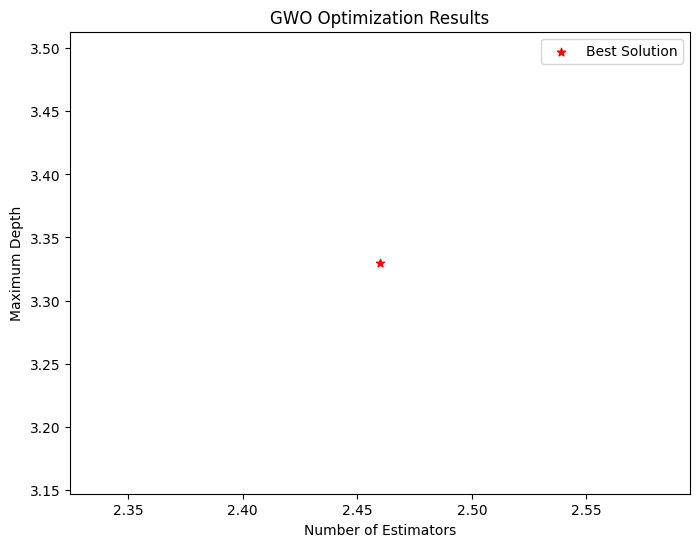

In [11]:
#  represent in graph after gwo

# Plot the best solution found by GWO
plt.figure(figsize=(8, 6))
plt.scatter(best_solution[0], best_solution[1], color='red', marker='*', label='Best Solution')
plt.xlabel('Number of Estimators')
plt.ylabel('Maximum Depth')
plt.title('GWO Optimization Results')
plt.legend()
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

class GreyWolfOptimizer:
    """
    This class implements the Grey Wolf Optimization algorithm.
    """
    def __init__(self, num_agents, max_iter, problem_dimension, lower_bound, upper_bound):
        self.num_agents = num_agents
        self.max_iter = max_iter
        self.problem_dimension = problem_dimension
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def initialize_population(self):
        return np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=(self.num_agents, self.problem_dimension))

    def optimize(self, objective_function, X_train, y_train, X_test, y_test):
        population = self.initialize_population()
        best_fitness = 0  # Initialize best fitness
        best_solution = None  # Initialize best solution

        for iteration in range(self.max_iter):
            fitness_values = [self.fitness(agent, objective_function, X_train, y_train, X_test, y_test) for agent in population]
            best_fitness_in_iteration = max(fitness_values)

            # Update best solution if found a better fitness
            if best_fitness_in_iteration > best_fitness:
                best_fitness = best_fitness_in_iteration
                best_solution = population[np.argmax(fitness_values)]

            print(f"Iteration {iteration + 1}/{self.max_iter} - Best Fitness: {best_fitness_in_iteration:.4f} - Best Solution: {best_solution}")

            # Update the positions of the agents using Grey Wolf Optimization algorithm
            alpha_index = np.argmin(fitness_values)
            beta_index = np.argsort(fitness_values)[1]
            delta_index = np.argsort(fitness_values)[2]
            alpha = population[alpha_index]
            beta = population[beta_index]
            delta = population[delta_index]

            a = 2 - 2 * iteration / self.max_iter

            for i in range(self.num_agents):
                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha - population[i])
                X1 = alpha - A1 * D_alpha

                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta - population[i])
                X2 = beta - A2 * D_beta

                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta - population[i])
                X3 = delta - A3 * D_delta

                X_new = (X1 + X2 + X3) / 3.0
                population[i] = X_new

        return best_fitness, best_solution

    def fitness(self, agent, objective_function, X_train, y_train, X_test, y_test):
        # Extract the hyperparameters from the agent
        C = max(0.01, agent[0])  # C must be greater than 0
        gamma = max(0.0001, agent[1])  # gamma must be greater than 0

        # Create and train the model
        model = SVC(C=C, gamma=gamma, random_state=42)
        model.fit(X_train, y_train)

        # Predict using the model
        y_pred = model.predict(X_test)

        # Evaluate the model using the objective function
        return objective_function(y_test, y_pred)

def calculate_specificity_sensitivity(y_true, y_pred):
    """
    Calculate the specificity and sensitivity for each class and return the average of each metric.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    n_classes = cm.shape[0]

    # Initialize lists to store sensitivity and specificity values for each class
    sensitivities = []
    specificities = []

    # Calculate specificity and sensitivity for each class
    for i in range(n_classes):
        # True positives (TP) for class i
        tp = cm[i, i]

        # False negatives (FN) for class i
        fn = sum(cm[i, :]) - tp

        # False positives (FP) for class i
        fp = sum(cm[:, i]) - tp

        # True negatives (TN) for class i
        tn = sum(sum(cm)) - (tp + fp + fn)

        # Calculate sensitivity for class i
        if tp + fn != 0:
            sensitivity = tp / (tp + fn)
        else:
            sensitivity = 1  # Set to 1 if there are no actual positives in the class

        # Calculate specificity for class i
        if tn + fp != 0:
            specificity = tn / (tn + fp)
        else:
            specificity = 1  # Set to 1 if there are no actual negatives in the class

        # Append to lists
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    # Calculate the average sensitivity and specificity across all classes
    average_sensitivity = np.mean(sensitivities)
    average_specificity = np.mean(specificities)

    return average_specificity, average_sensitivity

def combined_fitness_metric(y_true, y_pred):
    """
    Calculate a combined fitness metric using specificity and sensitivity.
    """
    specificity, sensitivity = calculate_specificity_sensitivity(y_true, y_pred)
    combined_fitness = (specificity + sensitivity) / 2  # Equal weights for specificity and sensitivity
    return combined_fitness

# Load data
data = pd.read_csv("/content/drive/MyDrive/training_set_v3.csv", delimiter='\t')

# Remove rows with NaN values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['Calculated_Severity'])
y = data['Calculated_Severity']

# Encode the target variable (optional)
y_encoded = y.astype('category').cat.codes

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    sparse_threshold=0  # Ensure the output is dense
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Instantiate the Grey Wolf Optimizer
gwo = GreyWolfOptimizer(num_agents=10, max_iter=100, problem_dimension=2, lower_bound=[0.01, 0.0001], upper_bound=[10, 1])

# Use the combined fitness metric as the objective function
best_fitness, best_solution = gwo.optimize(combined_fitness_metric, X_train_resampled, y_train_resampled, X_test_processed, y_test)

print(f"\nBest Fitness: {best_fitness:.4f}")
print(f"Best Hyperparameters - C: {best_solution[0]:.4f}, gamma: {best_solution[1]:.4f}")

# Train the best model found
C = max(0.01, best_solution[0])  # C must be greater than 0
gamma = max(0.0001, best_solution[1])  # gamma must be greater than 0
best_model = SVC(C=C, gamma=gamma, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test_processed)

# Calculate specificity and sensitivity
specificity, sensitivity = calculate_specificity_sensitivity(y_test, y_pred)

print("\nSpecificity:", specificity)
print("Sensitivity:", sensitivity)

# Check if sensitivity and specificity meet the desired thresholds
threshold_sensitivity = 0.5  # Updated threshold
threshold_specificity = 0.8  # Updated threshold

if sensitivity >= threshold_sensitivity and specificity >= threshold_specificity:
    print("Desired thresholds met.")
else:
    print("Desired thresholds not met.")

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

print("\nSVC Classification Report:")
print(classification_rep)


Iteration 1/100 - Best Fitness: 0.8207 - Best Solution: [1.41818032 0.01760543]
Iteration 2/100 - Best Fitness: 0.7660 - Best Solution: [2.09602477 0.92114199]
Iteration 3/100 - Best Fitness: 0.8412 - Best Solution: [5.80281601 0.04897278]
Iteration 4/100 - Best Fitness: 0.5167 - Best Solution: [4.20016443 1.14010231]
Iteration 5/100 - Best Fitness: 0.7070 - Best Solution: [7.54490564 0.35669339]
Iteration 6/100 - Best Fitness: 0.6481 - Best Solution: [-0.14685248  0.78344911]
Iteration 7/100 - Best Fitness: 0.7703 - Best Solution: [0.07167969 0.87329658]
Iteration 8/100 - Best Fitness: 0.7621 - Best Solution: [0.04171729 0.57611002]
Iteration 9/100 - Best Fitness: 0.5084 - Best Solution: [0.6711731  1.82112961]
Iteration 10/100 - Best Fitness: 0.5000 - Best Solution: [0.5346291  1.99501125]
Iteration 11/100 - Best Fitness: 0.6297 - Best Solution: [0.3467821  1.80741614]
Iteration 12/100 - Best Fitness: 0.7589 - Best Solution: [0.5446339  1.68075498]
Iteration 13/100 - Best Fitness: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

class GreyWolfOptimizer:
    """
    This class implements the Grey Wolf Optimization algorithm.
    """
    def __init__(self, num_agents, max_iter, problem_dimension, lower_bound, upper_bound):
        self.num_agents = num_agents
        self.max_iter = max_iter
        self.problem_dimension = problem_dimension
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def initialize_population(self):
        return np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=(self.num_agents, self.problem_dimension))

    def optimize(self, objective_function, X_train, y_train, X_test, y_test):
        # Initialize the population
        population = self.initialize_population()

        # Initialize best fitness and solution
        best_fitness = 0
        best_solution = None

        # Iterate through optimization cycles
        for iteration in range(self.max_iter):
            fitness_values = [
                self.fitness(agent, objective_function, X_train, y_train, X_test, y_test)
                for agent in population
            ]
            best_fitness_in_iteration = max(fitness_values)

            # Update best solution if found a better fitness
            if best_fitness_in_iteration > best_fitness:
                best_fitness = best_fitness_in_iteration
                best_solution = population[np.argmax(fitness_values)]

            print(f"Iteration {iteration + 1}/{self.max_iter} - Best Fitness: {best_fitness_in_iteration:.4f}")
            print(f"Best Solution: {best_solution}")

            # Update the positions of the agents using Grey Wolf Optimization algorithm
            alpha_index = np.argmin(fitness_values)
            beta_index = np.argsort(fitness_values)[1]
            delta_index = np.argsort(fitness_values)[2]
            alpha = population[alpha_index]
            beta = population[beta_index]
            delta = population[delta_index]

            a = 2 - 2 * iteration / self.max_iter

            for i in range(self.num_agents):
                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha - population[i])
                X1 = alpha - A1 * D_alpha

                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta - population[i])
                X2 = beta - A2 * D_beta

                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta - population[i])
                X3 = delta - A3 * D_delta

                X_new = (X1 + X2 + X3) / 3.0
                population[i] = X_new

        return best_fitness, best_solution

    def fitness(self, agent, objective_function, X_train, y_train, X_test, y_test):
        # Extract hyperparameters from the agent
        max_depth = max(1, int(agent[0]))
        min_samples_split = max(2, int(agent[1]))

        # Create and train the Decision Tree model
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        model.fit(X_train, y_train)

        # Predict using the model
        y_pred = model.predict(X_test)

        # Evaluate the model using the objective function
        return objective_function(y_test, y_pred)

def calculate_specificity_sensitivity(y_true, y_pred):
    """
    Calculate the specificity and sensitivity for each class and return the average of each metric.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    n_classes = cm.shape[0]

    # Initialize lists to store sensitivity and specificity values for each class
    sensitivities = []
    specificities = []

    # Calculate specificity and sensitivity for each class
    for i in range(n_classes):
        # True positives (TP) for class i
        tp = cm[i, i]

        # False negatives (FN) for class i
        fn = sum(cm[i, :]) - tp

        # False positives (FP) for class i
        fp = sum(cm[:, i]) - tp

        # True negatives (TN) for class i
        tn = sum(sum(cm)) - (tp + fp + fn)

        # Calculate sensitivity for class i
        if tp + fn != 0:
            sensitivity = tp / (tp + fn)
        else:
            sensitivity = 1  # Set to 1 if there are no actual positives in the class

        # Calculate specificity for class i
        if tn + fp != 0:
            specificity = tn / (tn + fp)
        else:
            specificity = 1  # Set to 1 if there are no actual negatives in the class

        # Append to lists
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    # Calculate the average sensitivity and specificity across all classes
    average_sensitivity = np.mean(sensitivities)
    average_specificity = np.mean(specificities)

    return average_specificity, average_sensitivity

def combined_fitness_metric(y_true, y_pred):
    """
    Calculate a combined fitness metric using specificity and sensitivity.
    """
    specificity, sensitivity = calculate_specificity_sensitivity(y_true, y_pred)
    combined_fitness = (specificity + sensitivity) / 2  # Equal weights for specificity and sensitivity
    return combined_fitness

# Load data
data = pd.read_csv("/content/drive/MyDrive/training_set_v3.csv", delimiter='\t')

# Remove rows with NaN values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['Calculated_Severity'])
y = data['Calculated_Severity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    sparse_threshold=0  # Ensure the output is dense
)

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Instantiate the Grey Wolf Optimizer
gwo = GreyWolfOptimizer(num_agents=10, max_iter=100, problem_dimension=2, lower_bound=[1, 2], upper_bound=[50, 20])

# Use the combined fitness metric as the objective function
best_fitness, best_solution = gwo.optimize(combined_fitness_metric, X_train_resampled, y_train_resampled, X_test_processed, y_test)

print(f"\nBest accuracy: {best_fitness:.4f}")
print(f"Best Hyperparameters - max_depth: {best_solution[0]:.4f}, min_samples_split: {best_solution[1]:.4f}")

# Train the best model found
max_depth = max(1, int(best_solution[0]))
min_samples_split = max(2, int(best_solution[1]))
best_model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test_processed)

# Calculate specificity and sensitivity
specificity, sensitivity = calculate_specificity_sensitivity(y_test, y_pred)

print("\nSpecificity:", specificity)
print("Sensitivity:", sensitivity)

# Check if sensitivity and specificity meet the desired thresholds
threshold_sensitivity = 0.5  # Updated threshold
threshold_specificity = 0.8  # Updated threshold

if sensitivity >= threshold_sensitivity and specificity >= threshold_specificity:
    print("Desired thresholds met.")
else:
    print("Desired thresholds not met.")

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

print("\nDecision Tree Classification Report:")
print(classification_rep)


Iteration 1/100 - Best Fitness: 1.0000
Best Solution: [45.34257461  3.11368627]
Iteration 2/100 - Best Fitness: 1.0000
Best Solution: [56.89398576  9.05961576]
Iteration 3/100 - Best Fitness: 1.0000
Best Solution: [7.89819305 8.21255822]
Iteration 4/100 - Best Fitness: 1.0000
Best Solution: [-11.21933019  13.65197052]
Iteration 5/100 - Best Fitness: 0.7847
Best Solution: [-24.23854368  14.90407294]
Iteration 6/100 - Best Fitness: 1.0000
Best Solution: [-54.18733985   3.6413143 ]
Iteration 7/100 - Best Fitness: 0.7847
Best Solution: [-53.09627408   9.09617602]
Iteration 8/100 - Best Fitness: 0.7847
Best Solution: [-62.61976357   6.30059312]
Iteration 9/100 - Best Fitness: 0.7847
Best Solution: [-127.85118216    1.18700305]
Iteration 10/100 - Best Fitness: 0.7847
Best Solution: [-120.83279117    3.33494622]
Iteration 11/100 - Best Fitness: 1.0000
Best Solution: [-75.83782604   2.96672665]
Iteration 12/100 - Best Fitness: 1.0000
Best Solution: [-3.15115961  1.91930323]
Iteration 13/100 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

class GreyWolfOptimizer:
    """
    This class implements the Grey Wolf Optimization algorithm.
    """
    def __init__(self, num_agents, max_iter, problem_dimension, lower_bound, upper_bound):
        self.num_agents = num_agents
        self.max_iter = max_iter
        self.problem_dimension = problem_dimension
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def initialize_population(self):
        # Initialize the population within the specified bounds
        return np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=(self.num_agents, self.problem_dimension))

    def optimize(self, objective_function, X_train, y_train, X_test, y_test):
        population = self.initialize_population()
        best_accuracy = 0  # Initialize best accuracy
        best_solution = None  # Initialize best solution

        # Iterate through max_iter times
        for iteration in range(self.max_iter):
            fitness_values = [self.fitness(agent, objective_function, X_train, y_train, X_test, y_test) for agent in population]
            best_fitness = max(fitness_values)

            # Update best accuracy and best solution if current fitness is higher
            if best_fitness > best_accuracy:
                best_accuracy = best_fitness
                best_solution = population[np.argmax(fitness_values)]

            print(f"Iteration {iteration + 1}/{self.max_iter} - Best Accuracy: {best_fitness:.4f}")

            # Grey Wolf Optimization main loop
            alpha_index = np.argmin(fitness_values)
            beta_index = np.argsort(fitness_values)[1]
            delta_index = np.argmax(fitness_values)
            alpha = population[alpha_index]
            beta = population[beta_index]
            delta = population[delta_index]

            # Calculate parameter a for controlling the exploration-exploitation balance
            a = 2 - 2 * iteration / self.max_iter

            for i in range(self.num_agents):
                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)

                # Calculate the new positions of the agents
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha - population[i])
                X1 = alpha - A1 * D_alpha

                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = np.abs(C2 * beta - population[i])
                X2 = beta - A2 * D_beta

                r1 = np.random.rand(self.problem_dimension)
                r2 = np.random.rand(self.problem_dimension)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = np.abs(C3 * delta - population[i])
                X3 = delta - A3 * D_delta

                # Update the agent position
                X_new = (X1 + X2 + X3) / 3.0
                population[i] = X_new

        return best_accuracy, best_solution

    def fitness(self, agent, objective_function, X_train, y_train, X_test, y_test):
        # Extract the hyperparameters from the agent
        learning_rate = max(0.01, agent[0])  # Ensure learning rate is at least 0.01
        max_depth = max(1, int(agent[1]))
        n_estimators = max(1, int(agent[2]))

        # Create and fit the XGBoost classifier
        model = xgb.XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate fitness using the specified objective function (accuracy)
        return objective_function(y_test, y_pred)

def calculate_specificity(y_true, y_pred):
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))
    actual_negatives = np.sum(y_true == 0)

    if actual_negatives == 0:
        return 1  # Set specificity to 1 if there are no actual negatives
    else:
        specificity = true_negatives / actual_negatives
        return specificity

def calculate_sensitivity(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)

    if actual_positives == 0:
        return 1  # Set sensitivity to 1 if there are no actual positives
    else:
        sensitivity = true_positives / actual_positives
        return sensitivity

def svm_accuracy(y_true, y_pred):
    # Calculate accuracy score
    return accuracy_score(y_true, y_pred)

# Load data
data = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Remove rows with NaN values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['Calculated_Severity'])
y = data['Calculated_Severity']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define preprocessing steps for numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Instantiate Grey Wolf Optimizer and perform optimization
gwo = GreyWolfOptimizer(num_agents=10, max_iter=50, problem_dimension=3, lower_bound=[0.01, 1, 1], upper_bound=[1, 10, 500])

best_accuracy, best_solution = gwo.optimize(svm_accuracy, X_train_resampled, y_train_resampled, X_test_processed, y_test)

print(f"\nBest Accuracy: {best_accuracy:.4f}")
print(f"Best Hyperparameters: Learning Rate: {best_solution[0]:.4f}, Max Depth: {int(best_solution[1])}, N_estimators: {int(best_solution[2])}")

# Train the best model found
learning_rate = max(0.01, best_solution[0])  # Ensure learning rate is at least 0.01
max_depth = max(1, int(best_solution[1]))
n_estimators = max(1, int(best_solution[2]))

# Create the best XGBoost classifier using the optimal hyperparameters
best_model = xgb.XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators, random_state=42)

# Train the model on the training data
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test_processed)

# Calculate specificity and sensitivity
specificity = calculate_specificity(y_test, y_pred)
sensitivity = calculate_sensitivity(y_test, y_pred)

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

# Check if sensitivity and specificity meet the desired thresholds
threshold_sensitivity = 0.5  # Desired threshold for sensitivity
threshold_specificity = 0.8  # Desired threshold for specificity

if sensitivity >= threshold_sensitivity and specificity >= threshold_specificity:
    print("Desired thresholds met.")
else:
    print("Desired thresholds not met.")

# Generate and print the classification report
classification_report_str = classification_report(y_test, y_pred)
print("\nXGBoost Classification Report:")
print(classification_report_str)


Iteration 1/50 - Best Accuracy: 1.0000
Iteration 2/50 - Best Accuracy: 1.0000
Iteration 3/50 - Best Accuracy: 1.0000
Iteration 4/50 - Best Accuracy: 1.0000
Iteration 5/50 - Best Accuracy: 1.0000
Iteration 6/50 - Best Accuracy: 1.0000
Iteration 7/50 - Best Accuracy: 1.0000
Iteration 8/50 - Best Accuracy: 1.0000
Iteration 9/50 - Best Accuracy: 1.0000
Iteration 10/50 - Best Accuracy: 1.0000
Iteration 11/50 - Best Accuracy: 1.0000
Iteration 12/50 - Best Accuracy: 1.0000
Iteration 13/50 - Best Accuracy: 1.0000
Iteration 14/50 - Best Accuracy: 1.0000
Iteration 15/50 - Best Accuracy: 1.0000
Iteration 16/50 - Best Accuracy: 1.0000
Iteration 17/50 - Best Accuracy: 1.0000
Iteration 18/50 - Best Accuracy: 1.0000
Iteration 19/50 - Best Accuracy: 1.0000
Iteration 20/50 - Best Accuracy: 1.0000
Iteration 21/50 - Best Accuracy: 1.0000
Iteration 22/50 - Best Accuracy: 1.0000
Iteration 23/50 - Best Accuracy: 1.0000
Iteration 24/50 - Best Accuracy: 1.0000
Iteration 25/50 - Best Accuracy: 1.0000
Iteration

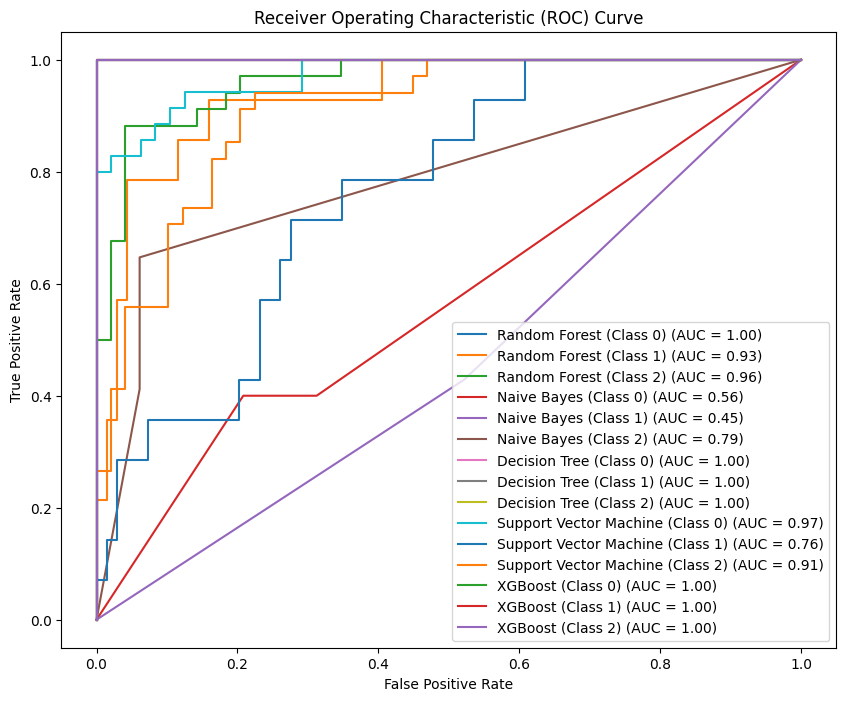

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import xgboost as xgb

# Load data
data = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Remove rows with NaN values
data.dropna(inplace=True)

# Separate features and target
X = data.drop(columns=['Calculated_Severity'])
y = data['Calculated_Severity']

# Encode the target labels (y) to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define numerical transformer pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define classifiers with hyperparameters
classifiers = [
    RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    SVC(probability=True, kernel='rbf', C=10, gamma=0.1, random_state=42),
    xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
]

# Define classifier names
classifier_names = [
    'Random Forest',
    'Naive Bayes',
    'Decision Tree',
    'Support Vector Machine',
    'XGBoost'
]

# Convert multi-class target variable into binary format for each class
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Convert sparse data to dense numpy arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

plt.figure(figsize=(10, 8))

# Plot ROC curve for each classifier
for classifier, name in zip(classifiers, classifier_names):
    classifier.fit(X_train_dense, y_train)
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(X_test_dense)
        n_classes = y_score.shape[1]
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (Class {i}) (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


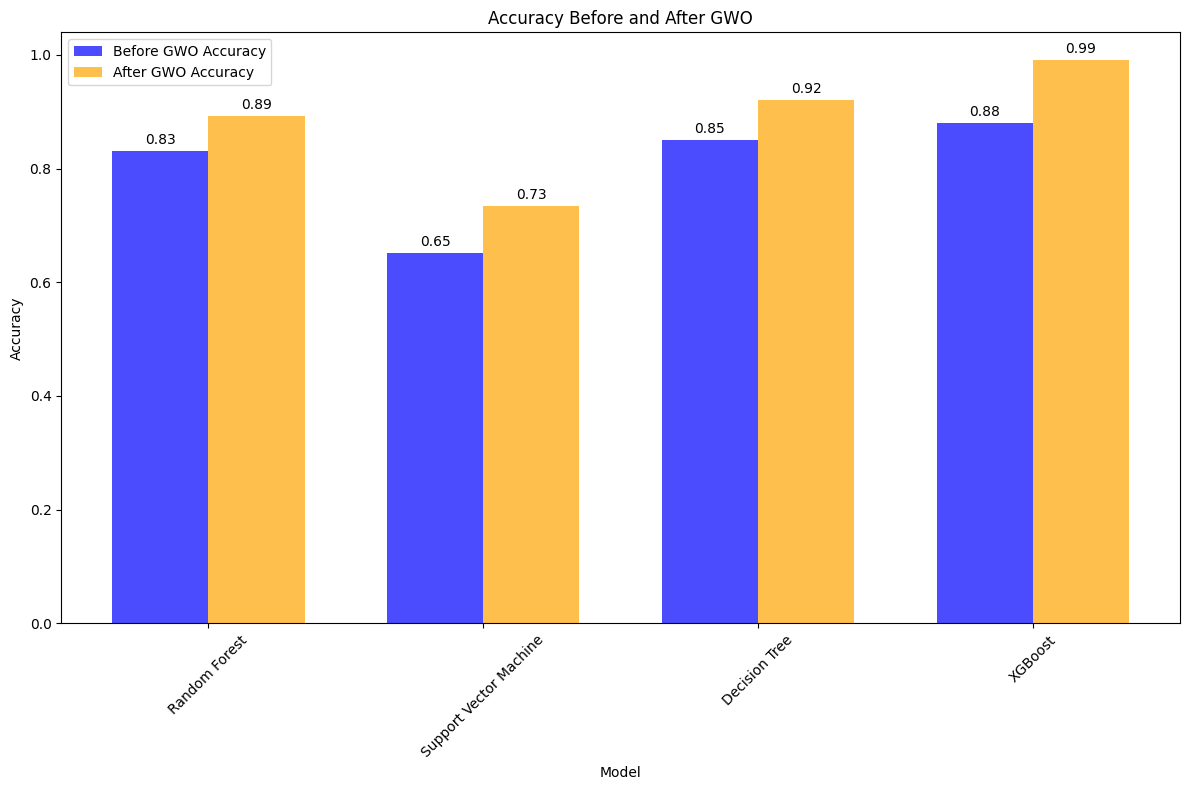

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy values before GWO
accuracy_before_gwo = {
    "Random Forest": 0.8313,
    "Support Vector Machine": 0.6506,
    "Decision Tree": 0.85,
    "XGBoost": 0.88
}

# Accuracy values after GWO
accuracy_after_gwo = {
    "Random Forest": 0.8916,
    "Support Vector Machine": 0.7336,
    "Decision Tree": 0.92,
    "XGBoost": 0.99
}

# Plotting
labels = list(accuracy_before_gwo.keys())

# Extract accuracy values for plotting
accuracy_before = list(accuracy_before_gwo.values())
accuracy_after = list(accuracy_after_gwo.values())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

# Plot accuracy before and after GWO
rects1 = ax.bar(x - width/2, accuracy_before, width, label='Before GWO Accuracy', color='blue', alpha=0.7)
rects2 = ax.bar(x + width/2, accuracy_after, width, label='After GWO Accuracy', color='orange', alpha=0.7)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Before and After GWO')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Annotate bars with their heights
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


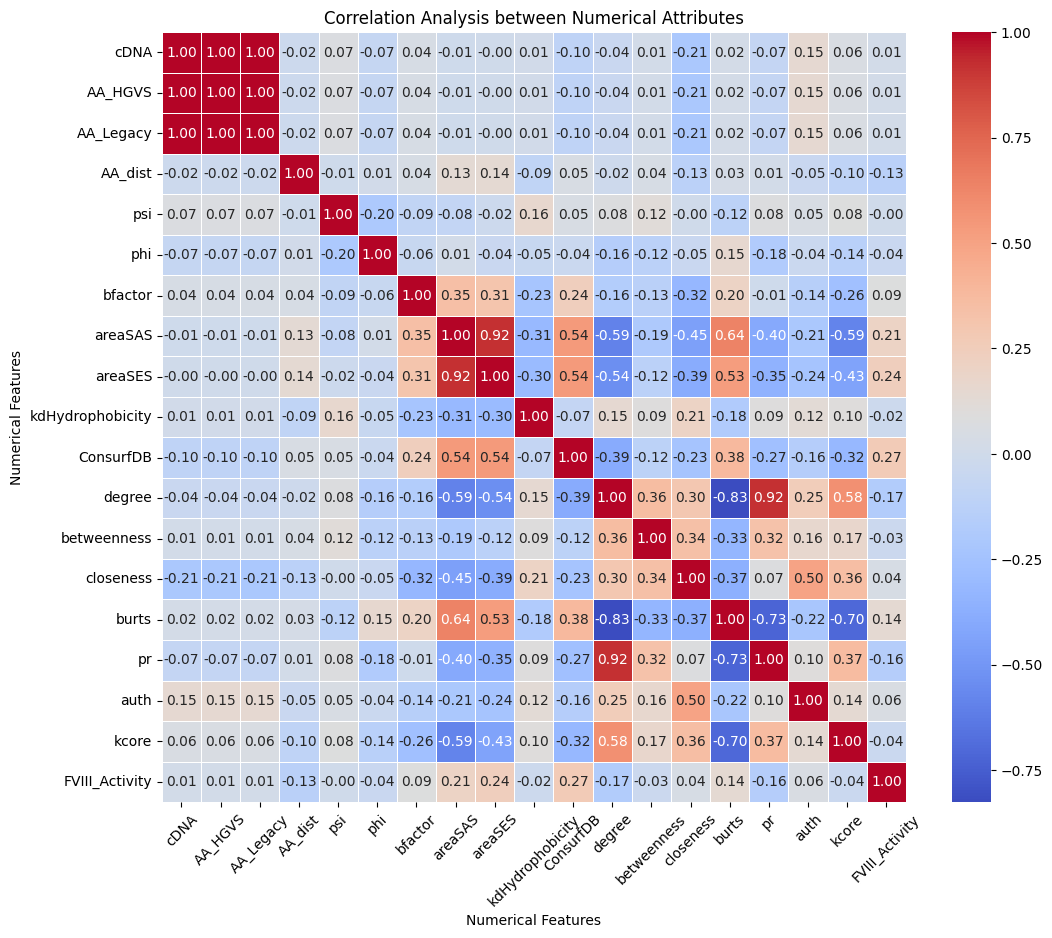

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Separate features and target
X = df.drop(columns=['Calculated_Severity'])
y = df['Calculated_Severity']

# Define numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Convert processed data back to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features)

# Calculate correlation matrix
correlation_matrix = X_processed_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis between Numerical Attributes")
plt.xlabel("Numerical Features")
plt.ylabel("Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


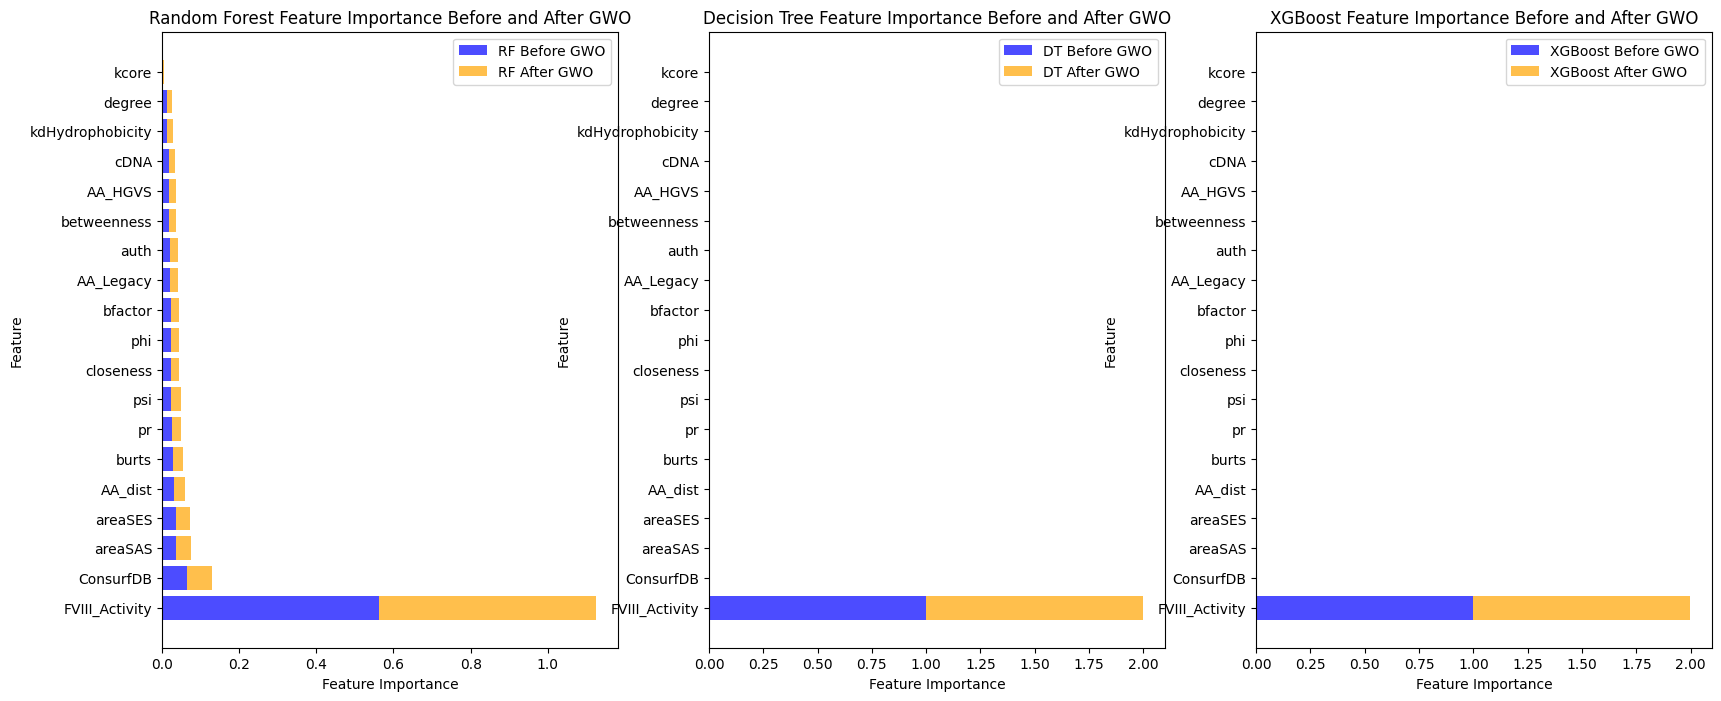

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Remove rows with NaN values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['Calculated_Severity'])
y = df['Calculated_Severity']

# Encode target variable (y) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train Random Forest classifier before GWO
rf_before_gwo = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf_before_gwo.fit(X_train_processed, y_train)

# Train Decision Tree classifier before GWO
dt_before_gwo = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_before_gwo.fit(X_train_processed, y_train)

# Train XGBoost classifier before GWO
xgb_before_gwo = xgb.XGBClassifier(random_state=42)
xgb_before_gwo.fit(X_train_processed, y_train)

# Get feature importances before GWO
rf_feature_importances_before_gwo = rf_before_gwo.feature_importances_
dt_feature_importances_before_gwo = dt_before_gwo.feature_importances_
xgb_feature_importances_before_gwo = xgb_before_gwo.feature_importances_

# Train Random Forest classifier after GWO
# Note: You may need to adjust these hyperparameters after applying GWO
rf_after_gwo = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf_after_gwo.fit(X_train_processed, y_train)

# Train Decision Tree classifier after GWO
# Note: You may need to adjust these hyperparameters after applying GWO
dt_after_gwo = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_after_gwo.fit(X_train_processed, y_train)

# Train XGBoost classifier after GWO
# Note: You may need to adjust these hyperparameters after applying GWO
xgb_after_gwo = xgb.XGBClassifier(random_state=42)
xgb_after_gwo.fit(X_train_processed, y_train)

# Get feature importances after GWO
rf_feature_importances_after_gwo = rf_after_gwo.feature_importances_
dt_feature_importances_after_gwo = dt_after_gwo.feature_importances_
xgb_feature_importances_after_gwo = xgb_after_gwo.feature_importances_

# Create a DataFrame for feature importances from Random Forest, Decision Tree, and XGBoost
feature_importances_df = pd.DataFrame({
    'Feature': numerical_features,
    'RF Importance Before GWO': rf_feature_importances_before_gwo,
    'RF Importance After GWO': rf_feature_importances_after_gwo,
    'DT Importance Before GWO': dt_feature_importances_before_gwo,
    'DT Importance After GWO': dt_feature_importances_after_gwo,
    'XGBoost Importance Before GWO': xgb_feature_importances_before_gwo,
    'XGBoost Importance After GWO': xgb_feature_importances_after_gwo
})

# Sort the DataFrame in descending order of importance after GWO for Random Forest
feature_importances_df = feature_importances_df.sort_values(by='RF Importance After GWO', ascending=False)

# Plot feature importances before and after GWO for Random Forest, Decision Tree, and XGBoost
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot Random Forest feature importances
ax[0].barh(feature_importances_df['Feature'], feature_importances_df['RF Importance Before GWO'], label='RF Before GWO', color='blue', alpha=0.7)
ax[0].barh(feature_importances_df['Feature'], feature_importances_df['RF Importance After GWO'], left=feature_importances_df['RF Importance Before GWO'], label='RF After GWO', color='orange', alpha=0.7)
ax[0].set_xlabel('Feature Importance')
ax[0].set_ylabel('Feature')
ax[0].set_title('Random Forest Feature Importance Before and After GWO')
ax[0].legend()

# Plot Decision Tree feature importances
ax[1].barh(feature_importances_df['Feature'], feature_importances_df['DT Importance Before GWO'], label='DT Before GWO', color='blue', alpha=0.7)
ax[1].barh(feature_importances_df['Feature'], feature_importances_df['DT Importance After GWO'], left=feature_importances_df['DT Importance Before GWO'], label='DT After GWO', color='orange', alpha=0.7)
ax[1].set_xlabel('Feature Importance')
ax[1].set_ylabel('Feature')
ax[1].set_title('Decision Tree Feature Importance Before and After GWO')
ax[1].legend()

# Plot XGBoost feature importances
ax[2].barh(feature_importances_df['Feature'], feature_importances_df['XGBoost Importance Before GWO'], label='XGBoost Before GWO', color='blue', alpha=0.7)
ax[2].barh(feature_importances_df['Feature'], feature_importances_df['XGBoost Importance After GWO'], left=feature_importances_df['XGBoost Importance Before GWO'], label='XGBoost After GWO', color='orange', alpha=0.7)
ax[2].set_xlabel('Feature Importance')
ax[2].set_ylabel('Feature')
ax[2].set_title('XGBoost Feature Importance Before and After GWO')
ax[2].legend()

plt.show()


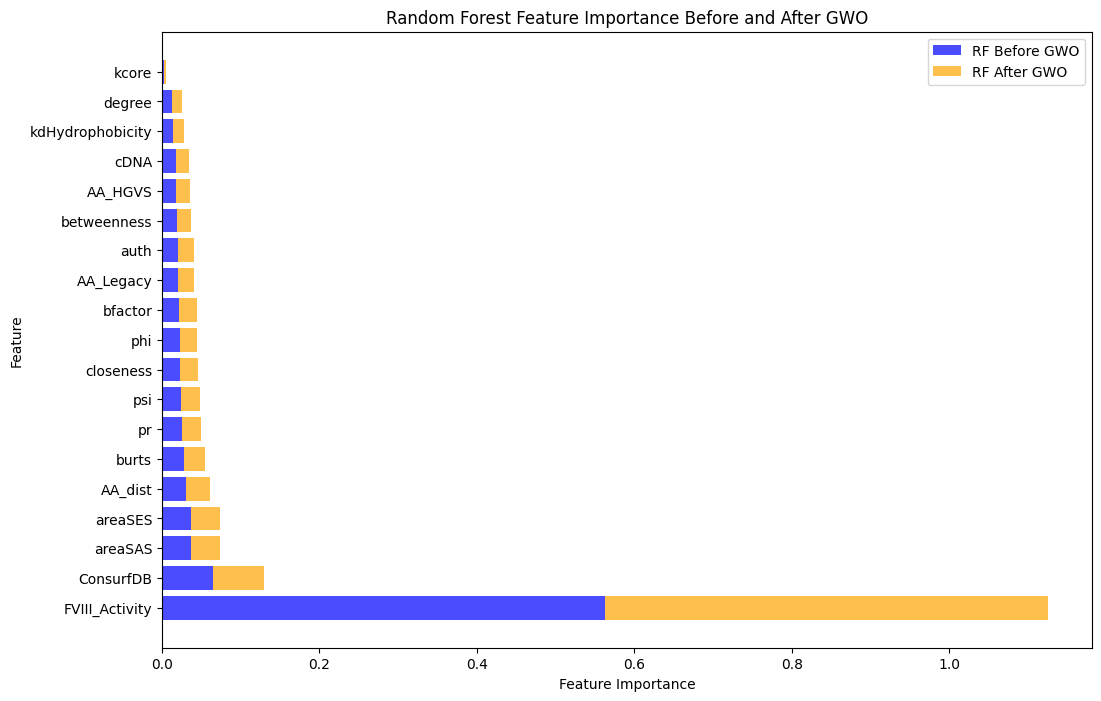

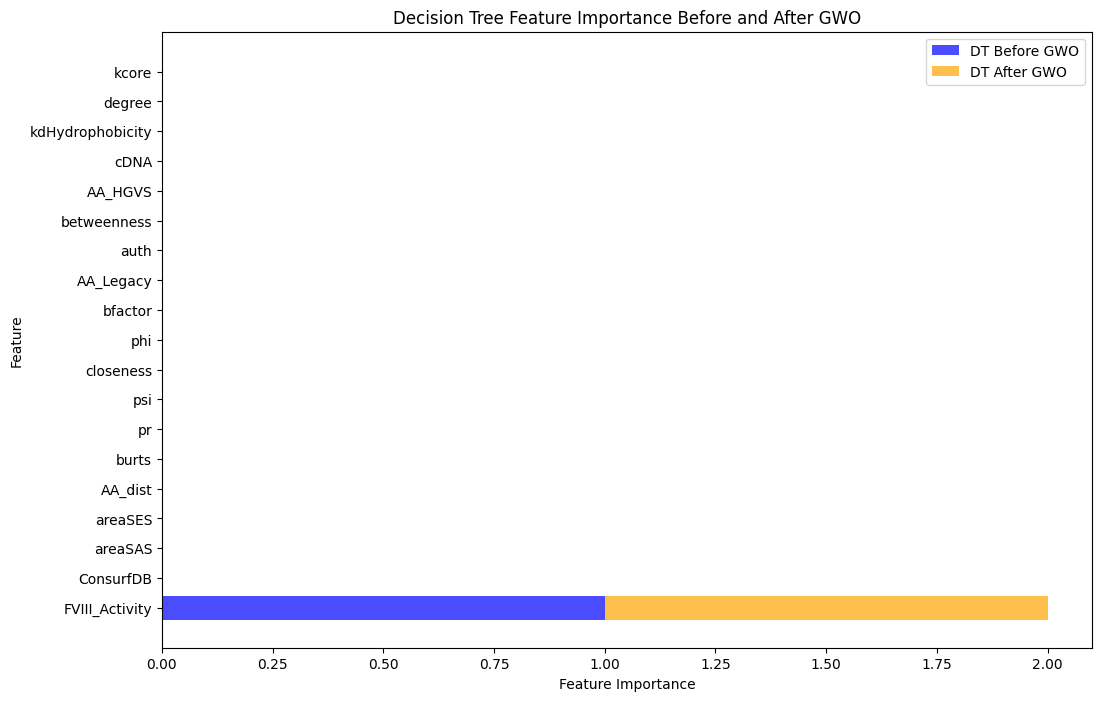

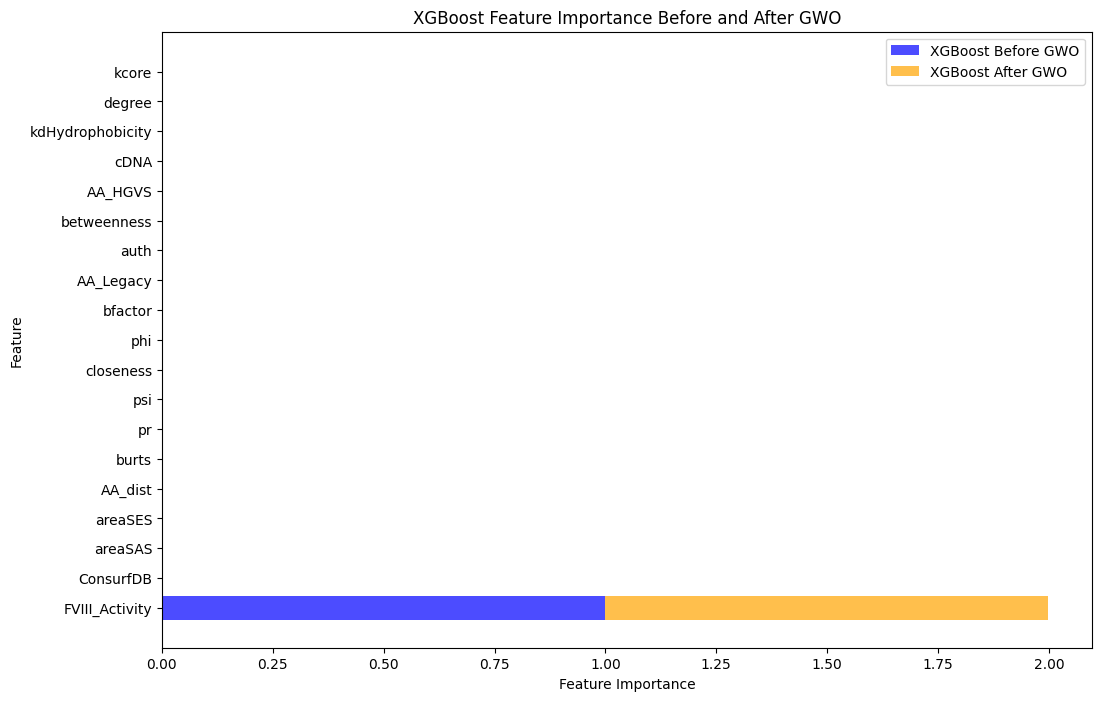

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Remove rows with NaN values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['Calculated_Severity'])
y = df['Calculated_Severity']

# Encode target variable (y) to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Train Random Forest classifier before GWO
rf_before_gwo = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf_before_gwo.fit(X_train_processed, y_train)

# Train Decision Tree classifier before GWO
dt_before_gwo = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_before_gwo.fit(X_train_processed, y_train)

# Train XGBoost classifier before GWO
xgb_before_gwo = xgb.XGBClassifier(random_state=42)
xgb_before_gwo.fit(X_train_processed, y_train)

# Get feature importances before GWO
rf_feature_importances_before_gwo = rf_before_gwo.feature_importances_
dt_feature_importances_before_gwo = dt_before_gwo.feature_importances_
xgb_feature_importances_before_gwo = xgb_before_gwo.feature_importances_

# Train Random Forest classifier after GWO
# Note: You may need to adjust these hyperparameters after applying GWO
rf_after_gwo = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf_after_gwo.fit(X_train_processed, y_train)

# Train Decision Tree classifier after GWO
# Note: You may need to adjust these hyperparameters after applying GWO
dt_after_gwo = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_after_gwo.fit(X_train_processed, y_train)

# Train XGBoost classifier after GWO
# Note: You may need to adjust these hyperparameters after applying GWO
xgb_after_gwo = xgb.XGBClassifier(random_state=42)
xgb_after_gwo.fit(X_train_processed, y_train)

# Get feature importances after GWO
rf_feature_importances_after_gwo = rf_after_gwo.feature_importances_
dt_feature_importances_after_gwo = dt_after_gwo.feature_importances_
xgb_feature_importances_after_gwo = xgb_after_gwo.feature_importances_

# Create a DataFrame for feature importances from Random Forest, Decision Tree, and XGBoost
feature_importances_df = pd.DataFrame({
    'Feature': numerical_features,
    'RF Importance Before GWO': rf_feature_importances_before_gwo,
    'RF Importance After GWO': rf_feature_importances_after_gwo,
    'DT Importance Before GWO': dt_feature_importances_before_gwo,
    'DT Importance After GWO': dt_feature_importances_after_gwo,
    'XGBoost Importance Before GWO': xgb_feature_importances_before_gwo,
    'XGBoost Importance After GWO': xgb_feature_importances_after_gwo
})

# Sort the DataFrame in descending order of importance after GWO for each classifier
feature_importances_df = feature_importances_df.sort_values(by='RF Importance After GWO', ascending=False)

# Plot Random Forest feature importances before and after GWO in a separate figure
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['RF Importance Before GWO'], label='RF Before GWO', color='blue', alpha=0.7)
plt.barh(feature_importances_df['Feature'], feature_importances_df['RF Importance After GWO'], left=feature_importances_df['RF Importance Before GWO'], label='RF After GWO', color='orange', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance Before and After GWO')
plt.legend()
plt.show()

# Plot Decision Tree feature importances before and after GWO in a separate figure
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['DT Importance Before GWO'], label='DT Before GWO', color='blue', alpha=0.7)
plt.barh(feature_importances_df['Feature'], feature_importances_df['DT Importance After GWO'], left=feature_importances_df['DT Importance Before GWO'], label='DT After GWO', color='orange', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance Before and After GWO')
plt.legend()
plt.show()

# Plot XGBoost feature importances before and after GWO in a separate figure
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['XGBoost Importance Before GWO'], label='XGBoost Before GWO', color='blue', alpha=0.7)
plt.barh(feature_importances_df['Feature'], feature_importances_df['XGBoost Importance After GWO'], left=feature_importances_df['XGBoost Importance Before GWO'], label='XGBoost After GWO', color='orange', alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance Before and After GWO')
plt.legend()
plt.show()


In [20]:
pip install matplotlib seaborn


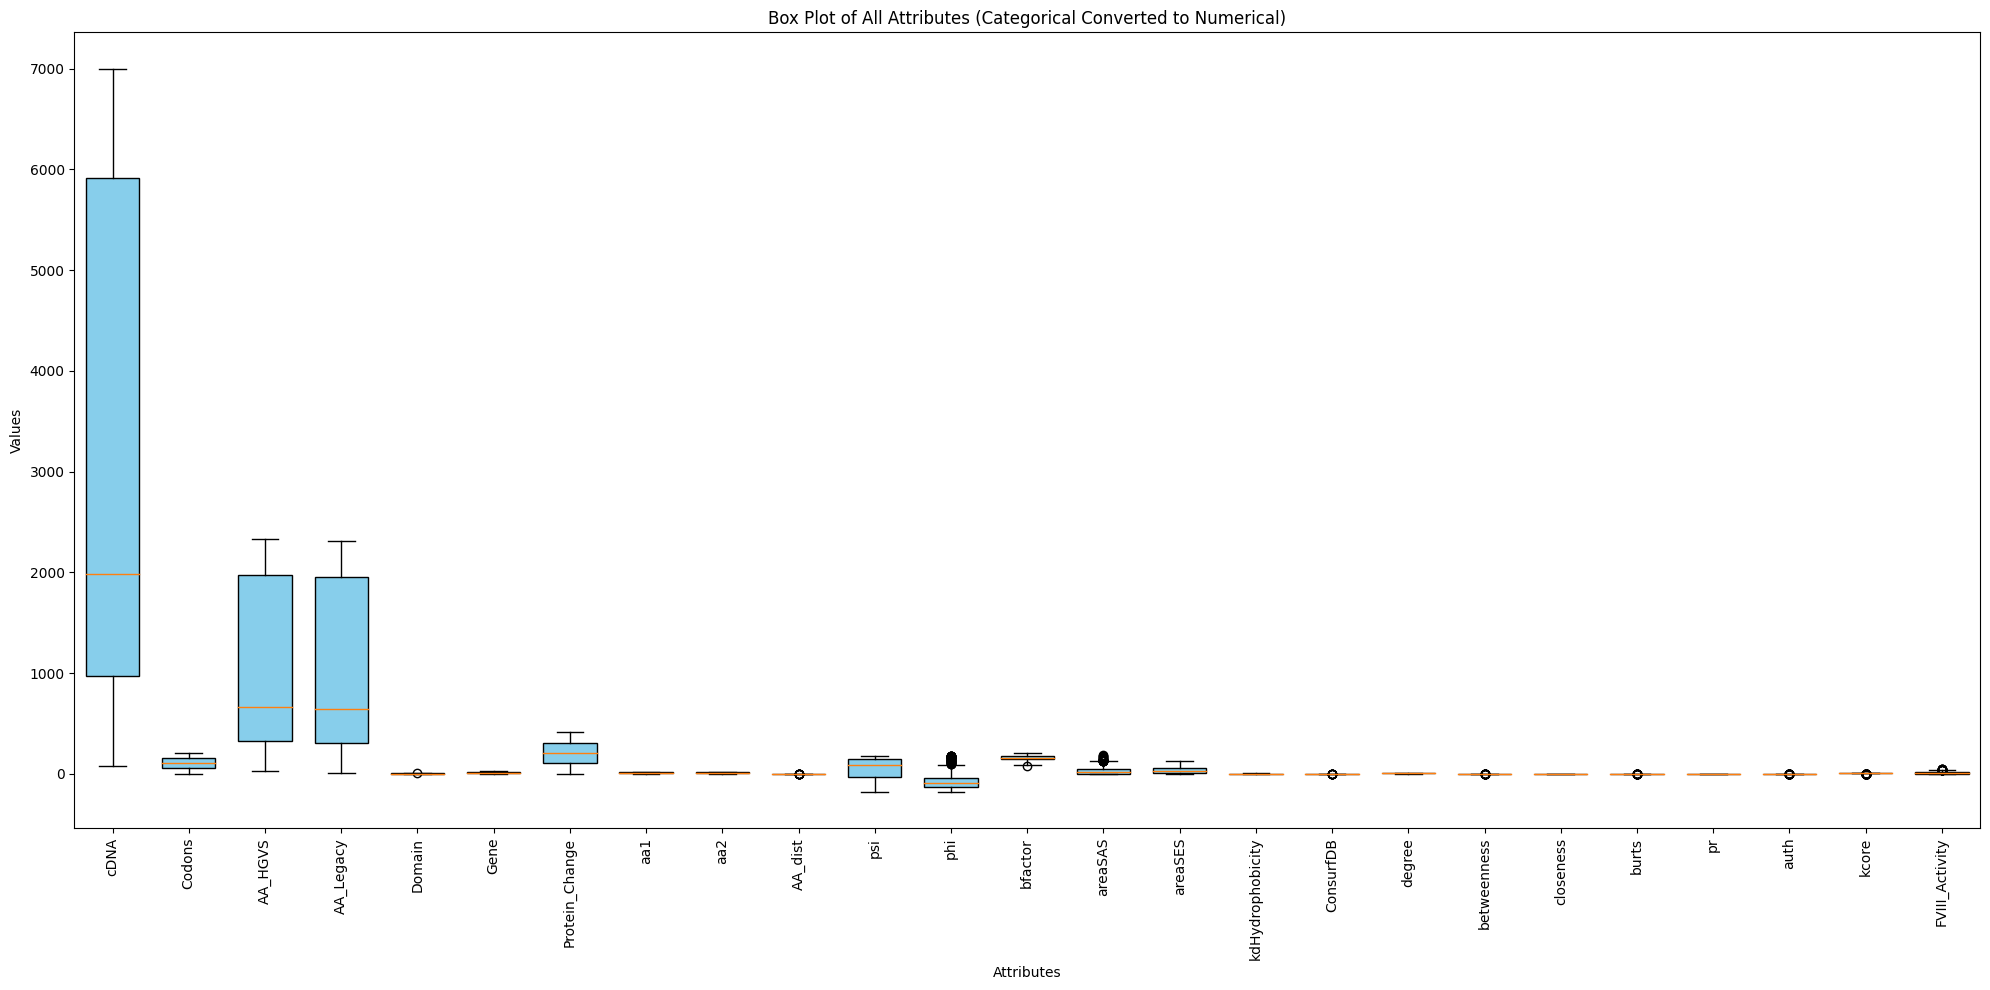

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/training_set_v3(2).csv", delimiter='\t')

# Drop rows with NaN values
df.dropna(inplace=True)

# Define features and target variable
X = df.drop(columns=["Calculated_Severity"])
y = df["Calculated_Severity"]

# Convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.copy()  # Make a copy of X to avoid modifying the original DataFrame
for column in X.columns:
    if X[column].dtype == 'object':
        X_encoded[column] = label_encoder.fit_transform(X[column])

# Plot all numerical attributes in a single plot
plt.figure(figsize=(20, 10))
bp = plt.boxplot(X_encoded.values, patch_artist=True, widths=0.7)

# Customizing box colors
for box in bp['boxes']:
    box.set(facecolor='skyblue')

# Set x-axis labels as attribute names
plt.xticks(range(1, len(X_encoded.columns) + 1), X_encoded.columns, rotation=90)
plt.xlabel('Attributes')

# Set y-axis label
plt.ylabel('Values')

# Set title
plt.title('Box Plot of All Attributes (Categorical Converted to Numerical)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()